In [1]:
import json

import angorapy as ang
import angorapy.environments
import bokeh
import numpy as np
from IPython.display import Image
from bokeh.io import output_notebook, show, export_png

from angorapy.analysis.investigation import Investigator
from angorapy.common.const import PATH_TO_EXPERIMENTS
from angorapy.utilities.monitor import training_plots as plots
output_notebook()

agent = ang.agent.PPOAgent.from_agent_state(1653053413, from_iteration="best")
investigator = Investigator.from_agent(agent)

2022-09-15 14:20:21.281960: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-15 14:20:21.447128: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-15 14:20:21.945886: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvrtc.so.11.1: cannot open shared object file: No such file or directory
2022-09-15 14:20:21.946050: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvrtc.so.11.1: cannot open shared object file: No such file 

A MuJoCo path exists. MuJoCo is being loaded...
Detected 1 GPU devices.


/home/weidler/workspace/angorapy-agents/venv/lib/python3.8/site-packages/bokeh/io/notebook.py:487: DeprecationWarning: The `source` parameter emit a  deprecation warning since IPython 8.0, it had no effects for a long time and will  be removed in future versions.
  publish_display_data(data, metadata, source, transient=transient, **kwargs)


Loading BokehJS ...

Loading from iteration best.
Using [StateNormalizationTransformer, RewardNormalizationTransformer] for preprocessing.


2022-09-15 14:20:25.180252: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-15 14:20:25.644871: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5027 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 SUPER, pci bus id: 0000:15:00.0, compute capability: 7.5


An MPI Optimizer with 1 ranks has been created; the following ranks optimize: [0]
An MPI Optimizer with 1 ranks has been created; the following ranks optimize: [0]
Loaded optimizer.


## Learning Curves & Statistics
First things first, let us see how training of this agent went. We can easily plot the reward over training cycles, as follows

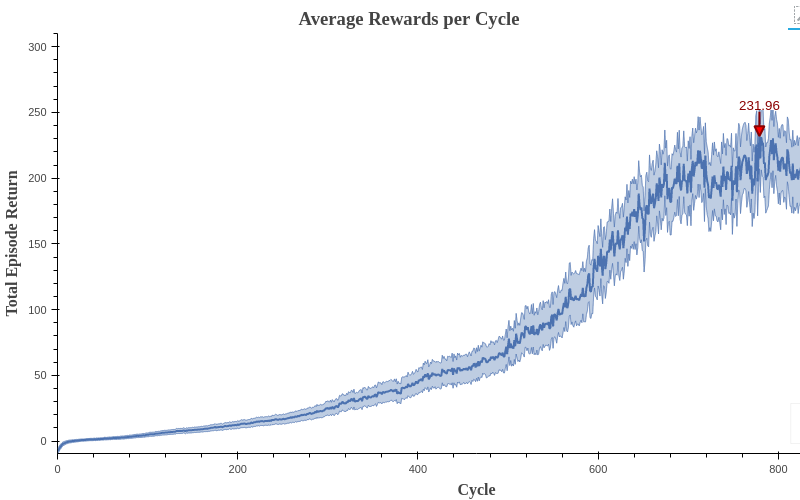

In [2]:
with open(f"{PATH_TO_EXPERIMENTS}/{agent.agent_id}/progress.json", "r") as f:
    progress_data = json.load(f)

reward_plot = plots.plot_reward_progress(progress_data["rewards"], [])
show(reward_plot)
# Image(filename=export_png(reward_plot, filename="manipulate_reward_curve.png"))   # for rendering on github

And the same we can do with the average episode length per cycle.

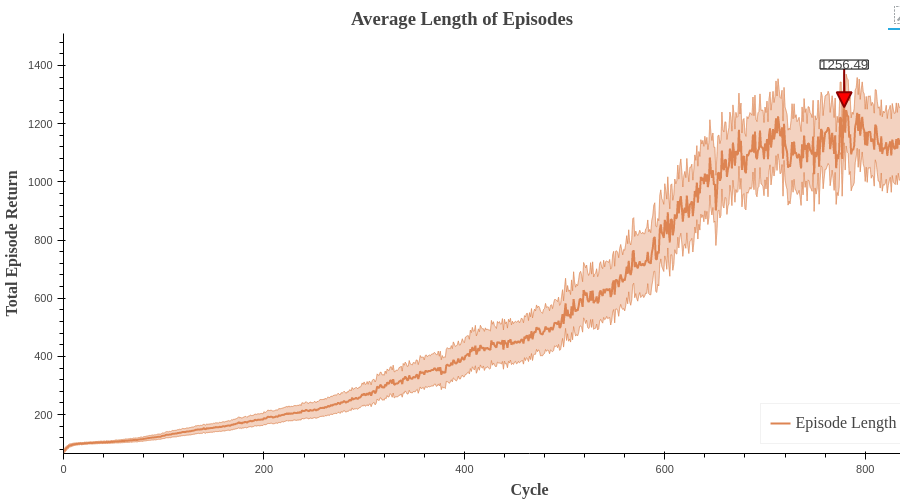

In [3]:
with open(f"{PATH_TO_EXPERIMENTS}/{agent.agent_id}/progress.json", "r") as f:
    progress_data = json.load(f)

length_plot = plots.plot_length_progress(progress_data["lengths"], [])
show(length_plot)
# Image(filename=export_png(length_plot, filename="manipulate_length_curve.png"))   # for rendering on github

## Evaluation

The above plots already show how performance progressed throughout training. Note, however, that AngoraPy trains agents with stochastic policies and, during training, encourages exploration. Thus, the above performance at every cycle is not entirely representative of the agents true potential. To evaluate its real performance, let us run 10 episodes without random exploration.

In [4]:
stats_eval = agent.evaluate(10, act_confidently=False)[0]  # todo act confidently

2022-09-15 14:20:32.377133: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8300


In [5]:
print(np.mean(stats_eval.episode_rewards))

247.3713595067086


## Rendering
Lastly, let us inspect qualitatively the behaviour of the agent, by rendering a few episodes.

In [6]:
for _ in range(10):
    investigator.render_episode(agent.env)

Setting up camera.
Camera setup finished.
Finished after 1613 steps with a score of 337.1989. 
Finished after 1097 steps with a score of 199.5511. 
Finished after 1066 steps with a score of 180.9016. 
Finished after 865 steps with a score of 158.4477. 
Finished after 2011 steps with a score of 351.1874. 
Finished after 1664 steps with a score of 304.8719. 
Finished after 247 steps with a score of 38.6115. 
Finished after 445 steps with a score of 66.1653. 
Finished after 1651 steps with a score of 333.6851. 
Finished after 278 steps with a score of 40.297. 
